<a href="https://colab.research.google.com/github/DJ1070/NLP/blob/main/nlp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer 
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
#import matplotlib.cm as cm
#from matplotlib import rcParams
from collections import Counter
#from nltk.tokenize import RegexpTokenizer
import re
import string
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving cleaned_tweets-half.csv to cleaned_tweets-half.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cleaned_tweets-half.csv']), sep = ";")

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cleaned_tweets-half.csv', sep = ";")

In [7]:
df

,Unnamed: 0,label,text
0,0,0,awww that's bummer shoulda got david carr thir...
1,1,0,dived many times ball managed save % rest go b...
2,2,0,behaving i'm mad can't see
3,3,0,need hug
4,4,0,k nope
...,...,...,...
799995,799995,1,wooooo xbox back
799996,799996,1,recovering long weekend
799997,799997,1,forster yeah work better waiting end wonder ti...
799998,799998,1,thewdb com cool hear old walt interviews ♫ ~bmta


In [8]:
df = df.drop('Unnamed: 0', axis = 1)

In [9]:
df.columns = ['label', 'tweet']

In [10]:
nltk.download('stopwords')
list_stopwords = stopwords.words('english')
stemmer = SnowballStemmer('english')
regex = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
def preprocess(text):
  text = re.sub(regex, ' ', str(text).lower()).strip()
  words = [] # new/cleaned sentence
  for word in text.split():
    if word not in list_stopwords:
      words.append(stemmer.stem(word))
  return " ".join(words)

In [12]:
df.tweet = df.tweet.apply(lambda x: preprocess(x))

In [13]:
df

,label,tweet
0,0,awww bummer shoulda got david carr third day
1,0,dive mani time ball manag save rest go bound
2,0,behav mad see
3,0,need hug
4,0,k nope
...,...,...
799995,1,wooooo xbox back
799996,1,recov long weekend
799997,1,forster yeah work better wait end wonder time ...
799998,1,thewdb com cool hear old walt interview bmta


In [14]:
X = df['tweet'].to_list()
y = df['label'].to_list()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 3)

In [16]:
vocab_size = 255000
embedding_dim = 16
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


make_tokens = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
make_tokens.fit_on_texts(x_train)

word_dict = make_tokens.word_index

training_sequences = make_tokens.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = make_tokens.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#testing_padded[0:5]
len(word_dict)
#word_dict

129731

In [17]:
embeddings_dictionary = dict()
embedding_dim = 100

In [ ]:
uploaded_files2 = files.upload()

Saving glove_100d_6b.txt to glove_100d_6b.txt


In [ ]:
glove_file = open(uploaded_files2['glove_100d_6b.txt'], 'r')

In [18]:
glove_file = open('/content/drive/MyDrive/Colab Notebooks/glove_100d_6b.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
    
glove_file.close()

embeddings_matrix = np.zeros((vocab_size, embedding_dim))

word_list = list(word_dict.keys())[0:vocab_size]
for iword, word in enumerate(word_list):
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embeddings_matrix[iword] = embedding_vector

In [19]:
embedding_layer = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False)

In [20]:
# y_train_labels = [ 1 if x ==4 else x for x in y_train]
# y_test_labels = [ 1 if x ==4 else x for x in y_test]

In [29]:
y_train_labels[1010]

1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 100)           25500000  
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16, 256)           234496    
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 16, 256)           394240    
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 256)           0         
_________________________________________________________________
bidirectional_5 (Bidirection (None, 16, 256)           394240    
_________________________________________________________________
dense_2 (Dense)              (None, 16, 64)           

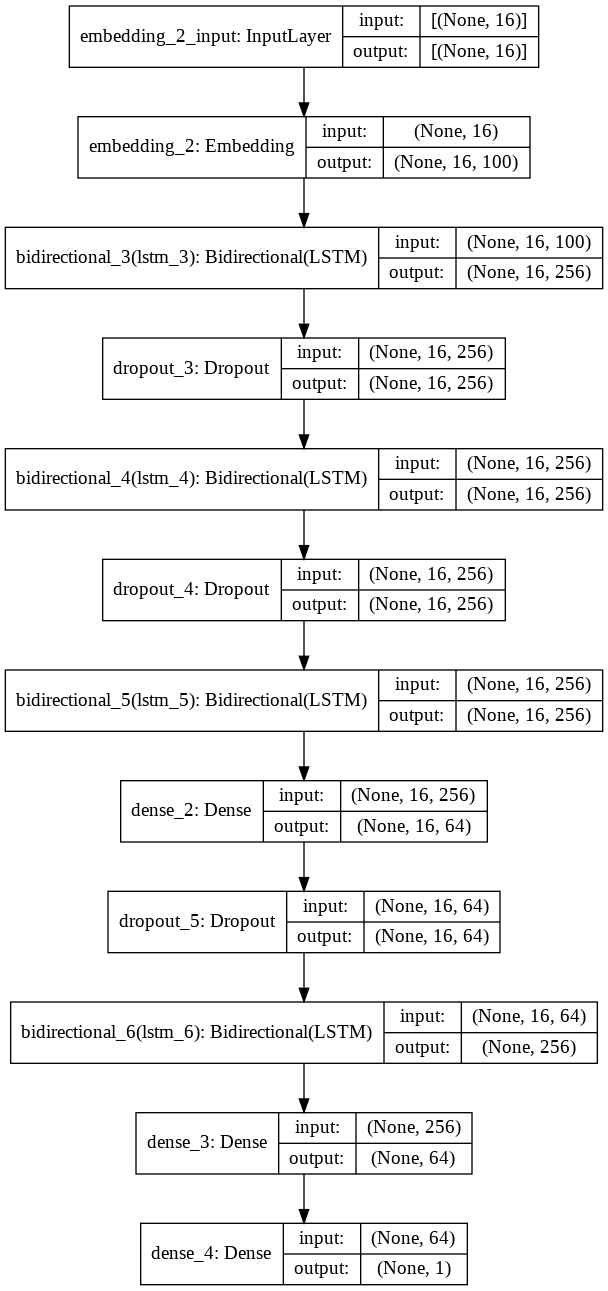

In [30]:
model = tf.keras.Sequential([
        #embedding_layer,
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

path = \
'model_checkpoint/at_{epoch}-{val_accuracy}'

model_checkpoint = ModelCheckpoint(filepath= path,
                             save_weights_only = True,
                             monitor = 'val_accuracy',
                             mode = 'max',
                             save_best_only = True,
                             save_freq = 'epoch',
                             verbose = 1)

In [32]:
num_epochs = 5
training_labels = np.array(y_train_labels)
testing_labels  = np.array(y_test_labels)
training_padded = np.array(training_padded)
testing_padded  = np.array(testing_padded)

history = model.fit(training_padded, training_labels,
                    batch_size = 128,
                    epochs=num_epochs,
                    validation_split= .25,
                    callbacks = [
                                 model_checkpoint,
                                 ReduceLROnPlateau(monitor= 'val_loss', cooldown=0, patience= 2),
                                 EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, patience = 2)
                                 ],
                    verbose=1)

Epoch 1/5
3750/3750 [==============================] - 1185s 313ms/step - loss: 0.5204 - accuracy: 0.7340 - val_loss: 0.4660 - val_accuracy: 0.7771

Epoch 00001: val_accuracy improved from -inf to 0.77715, saving model to model_checkpoint/at_1-0.7771499752998352
Epoch 2/5
3750/3750 [==============================] - 1165s 311ms/step - loss: 0.4261 - accuracy: 0.8026 - val_loss: 0.4702 - val_accuracy: 0.7750

Epoch 00002: val_accuracy did not improve from 0.77715
Epoch 3/5
3750/3750 [==============================] - 1165s 311ms/step - loss: 0.3775 - accuracy: 0.8293 - val_loss: 0.4873 - val_accuracy: 0.7696

Epoch 00003: val_accuracy did not improve from 0.77715


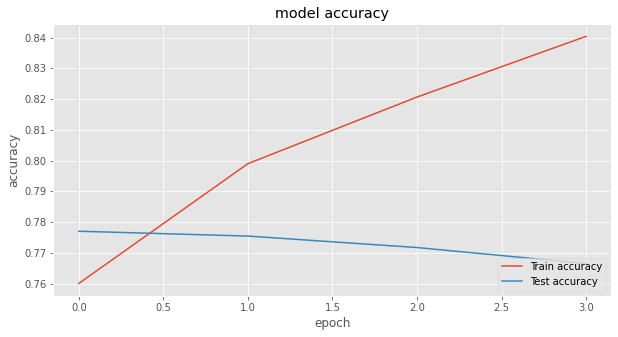

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()